# * Kurapati Venkatesh

# * 09012021

# * Topic: Recurrent Neural Network✨🧠🕸

# ------------------------------------------------------------------------------------------------------------

##  Problem Statements:

## ------------------------------------------------------------------------------------------------------------

## 1. Here is the time series data [110,125,133,146,158,172,187,196,210].  
## Build RNN/LSTM model to predict the next 10 digits.


In [33]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

In [34]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [35]:
# define input sequence
raw_seq = [110,125,133,146,158,172,187,196,210]

In [75]:
# choose a number of time steps
n_steps = 3

In [76]:
# split into samples
X, y = split_sequence(raw_seq, n_steps)

In [78]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [79]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [80]:
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [81]:
# demonstrate prediction
x_input = array([187,196,210])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[228.65675]]


## ------------------------------------------------------------------------------------------------------------

## 2. Write down the multiple applications of RNN.

##### RNNs are widely used in the following domains/ applications:

- Prediction problems
- Language Modelling and Generating Text
- Machine Translation
- Speech Recognition
- Generating Image Descriptions
- Video Tagging
- Text Summarization
- Call Center Analysis
- Face detection, OCR Applications as Image Recognition
- Other applications like Music composition

## ------------------------------------------------------------------------------------------------------------

## 3. How to do select the inputs for a LSTM/RNN models. Explain in the terms of timesteps, samples and feature.

The LSTM input layer is specified by the “input_shape” argument on the first hidden layer of the network.


For example, below is an example of a network with one hidden LSTM layer and one Dense output layer.

In [ ]:
model = Sequential()
model.add(LSTM(32))
model.add(Dense(1))

In this example, the LSTM() layer must specify the shape of the input.

The input to every LSTM layer must be three-dimensional.

The three dimensions of this input are:

- Samples. One sequence is one sample. A batch is comprised of one or more samples.
- Time Steps. One time step is one point of observation in the sample.
- Features. One feature is one observation at a time step.

This means that the input layer expects a 3D array of data when fitting the model and when making predictions, even if specific dimensions of the array contain a single value, e.g. one sample or one feature.

When defining the input layer of your LSTM network, the network assumes you have 1 or more samples and requires that you specify the number of time steps and the number of features. You can do this by specifying a tuple to the “input_shape” argument.

For example, the model below defines an input layer that expects 1 or more samples, 50 time steps, and 2 features.

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(50, 2)))
model.add(Dense(1))

Now that we know how to define an LSTM input layer and the expectations of 3D inputs, let’s look at some examples of how we can prepare our data for the LSTM.

##### Example of LSTM With Single Input Sample:

Consider the case where you have one sequence of multiple time steps and one feature.

For example, this could be a sequence of 10 values:

In [2]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

We can then use the reshape() function on the NumPy array to reshape this one-dimensional array into a three-dimensional array with 1 sample, 10 time steps, and 1 feature at each time step.

The reshape() function when called on an array takes one argument which is a tuple defining the new shape of the array. We cannot pass in any tuple of numbers; the reshape must evenly reorganize the data in the array.

In [3]:
data = data.reshape((1, 10, 1))

In [4]:
print(data.shape)

(1, 10, 1)


Putting all of this together, the complete example is listed below.

In [5]:
from numpy import array
data = array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
data = data.reshape((1, 10, 1))
print(data.shape)

(1, 10, 1)


Running the example prints the new 3D shape of the single sample.

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(10, 1)))
model.add(Dense(1))

## ------------------------------------------------------------------------------------------------------------

## 4. What are the disadvantages of MLP when dealing with sequence data.

Deep RNNs (RNNs with a large number of time steps) suffer from the vanishing and exploding gradient problem which is a common problem in all the different types of neural networks.

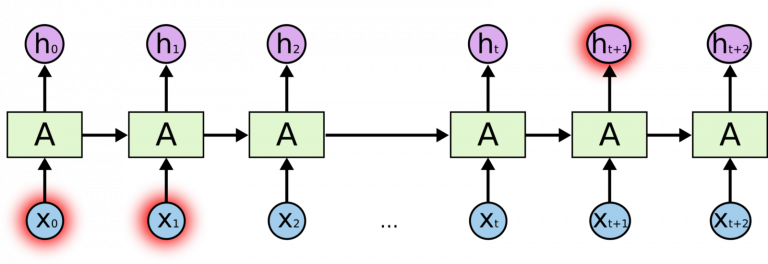

As you can see here, the gradient computed at the last time step vanishes as it reaches the initial time step.

Disadvantages of MLP include too many parameters because it is fully connected. Parameter number = width x depth x height. Each node is connected to another in a very dense web — resulting in redundancy and inefficiency.